# Семинар 2 - Цветовые пространства, гистограммы изображений, интегральные изображения

***

**Данный семинар содержит домашнее задание - оцениваемые упражнения и вопросы.**

Система оценивания: доля правильно решенных упражений. Максимальный балл, соответственно, 1.

В упражнениях оценивается два аспекта:
1. Код проходит assert'ы (если они есть)
2. Код корректен с точки зрения логики

Вопросы также оцениваются. Ответ на них нужно записывать в соответствующие markdown-ячейки.

Источник используемого аэрофотоснимка: https://sovzond.ru/upload/medialibrary/267/%D0%98%D1%81%D1%85%D0%BE%D0%B4%D0%BD%D1%8B%D0%B9-%D0%B0%D1%8D%D1%80%D0%BE%D1%84%D0%BE%D1%82%D0%BE%D1%81%D0%BD%D0%B8%D0%BC%D0%BE%D0%BA.jpg

In [1]:
from pathlib import Path

import cv2
import numpy as np

import matplotlib.pyplot as plt

In [2]:
AERIAL_IMG_PATH = "data/aerial_image.jpg"
SUNFLOWER_IMG_PATH = "data/sunflower.jpg"

# if not Path(AERIAL_IMG_PATH).exists() or not Path(SUNFLOWER_IMG_PATH).exists():
#     !git clone https://github.com/alexmelekhin/cv_course_2023.git
#     !mv cv_course_2023/seminars/seminar_02/data .

# 1. Цветовые пространства

Наиболее распространенным представлением цвета пикселя является пространство RGB. В таком представлении цвет представлен тремя числами: интенсивностями красного, зеленого и синего базисных цветов.

In [3]:
img = cv2.imread(SUNFLOWER_IMG_PATH)

In [4]:
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

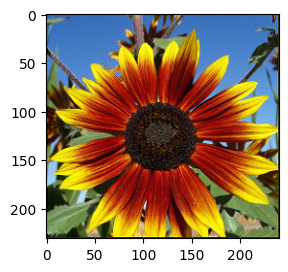

In [5]:
plt.figure(figsize=[3, 3])
plt.imshow(img_rgb);

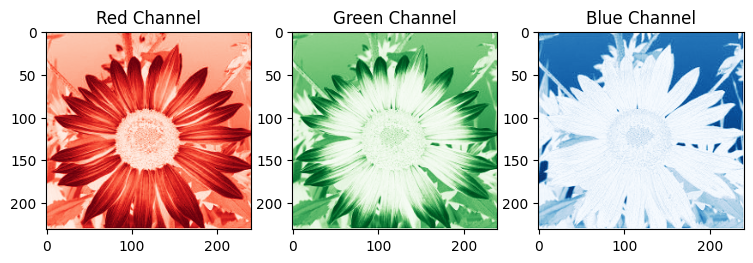

In [ ]:
plt.figure(figsize=[9, 3])

plt.subplot(131)
plt.imshow(img_rgb[:,:,0], cmap='Reds')
plt.title('Red Channel')

plt.subplot(132)
plt.imshow(img_rgb[:,:,1], cmap='Greens')
plt.title('Green Channel')

plt.subplot(133)
plt.imshow(img_rgb[:,:,2], cmap='Blues')
plt.title('Blue Channel')

plt.show()

cvtColor поддерживает конвертацию между множеством других цветовых схем. К примеру, чтобы получить серое изобаржение из цветного достаточно:

In [6]:
img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

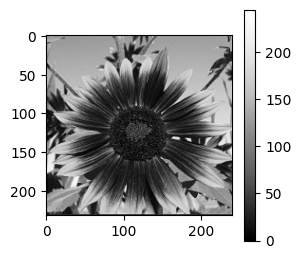

In [7]:
plt.figure(figsize=[3, 3])
plt.imshow(img_gray, cmap='Greys_r')
plt.colorbar()
plt.show()

## Вопрос 1

**Этот и все последующие вопросы - оцениваемые, для самостоятельной работы.**

Можно ли получить черно-белое изображение из RGB представления путем вычисления среднего значения интенсивностей каналов R, G и B? Почему?

**Ответ:** Серое значение=0.299⋅R+0.587⋅G+0.114⋅B, человеческий глаз по-разному воспринимает красный, синий и зеленый. Если взять среднее, то потеряем контраст изображения

## Вопрос 2

Почему мы использовали флаг `cmap='Greys_r'` при отображении черно-белого изображения? Чем отличается от `cmap='Greys'`?

**Ответ:** _r это reversed

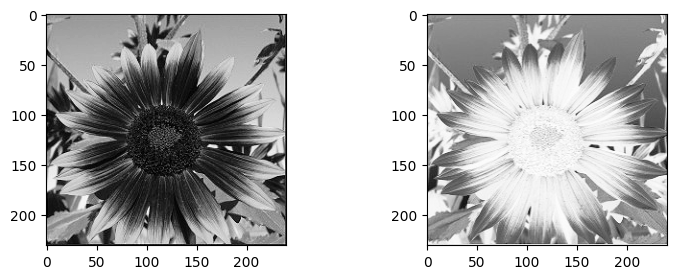

In [8]:
plt.figure(figsize=[9, 3])

plt.subplot(121)
plt.imshow(img_gray, cmap='Greys_r')

plt.subplot(122)
plt.imshow(img_gray, cmap='Greys')

plt.show()

Если не предполагается использовать информацию о цвете пикселей, то можно сразу загрузить изображение в оттенках серого:

In [9]:
img_gray = cv2.imread(SUNFLOWER_IMG_PATH, cv2.IMREAD_GRAYSCALE)

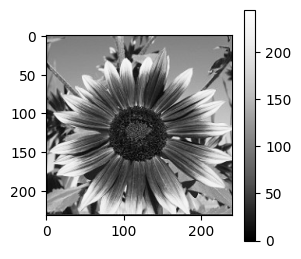

In [ ]:
plt.figure(figsize=[3, 3])
plt.imshow(img_gray, cmap='Greys_r')
plt.colorbar()
plt.show()

серое изображение - двумерный массив:

In [ ]:
print('type(img_gray) = ', type(img_gray))
print('img_gray.shape = ', img_gray.shape)
print('img_gray.dtype = ', img_gray.dtype)

type(img_gray) =  <class 'numpy.ndarray'>
img_gray.shape =  (231, 240)
img_gray.dtype =  uint8


## Упражнение 1: RGB to gray

**Это и все последующие упражения - оцениваемые, для самостоятельной работы.**

Реализуйте функцию преобразования цветного изображения в формате RGB в серое

(231, 240, 3)

In [ ]:
def convert_rgb_to_grayscale(img_rgb):
    #G = 0.299⋅R+0.587⋅G+0.114⋅B
    return np.round(0.299 * img_rgb[:,:,0] + 0.587 * img_rgb[:,:,1] +0.114 * img_rgb[:,:,2])

In [ ]:
np.allclose(rtol=1)

In [ ]:
assert((cv2.cvtColor(img_rgb, cv2.COLOR_RGB2GRAY) == convert_rgb_to_grayscale(img_rgb)).all())

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [ ]:
assert( np.allclose(cv2.cvtColor(img_rgb, cv2.COLOR_RGB2GRAY), convert_rgb_to_grayscale(img_rgb), atol=1.) )

12 не совпадающих символов

In [ ]:
ind = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2GRAY) != convert_rgb_to_grayscale(img_rgb)
cv2.cvtColor(img_rgb, cv2.COLOR_RGB2GRAY), convert_rgb_to_grayscale(img_rgb), np.sum(ind)

(array([[117, 112, 117, ..., 117, 124,  79],
        [121,  93,  91, ..., 111, 118,  58],
        [131,  94, 100, ..., 115, 126,  59],
        ...,
        [128,  10,  35, ..., 130, 150,  56],
        [136,   7,  17, ..., 151, 163,  74],
        [ 88,  36,  53, ...,  38,  50,  25]], dtype=uint8),
 array([[117., 112., 117., ..., 117., 124.,  79.],
        [121.,  93.,  91., ..., 111., 118.,  58.],
        [131.,  94., 100., ..., 115., 126.,  59.],
        ...,
        [128.,  10.,  35., ..., 130., 150.,  56.],
        [136.,   7.,  17., ..., 151., 163.,  74.],
        [ 88.,  36.,  53., ...,  38.,  50.,  25.]]),
 12)

Кроме RGB/BGR и grayscale существуют и другие цветовые представления. Преобразования между ними можно осуществлять с помощью библиотеки OpenCV следующим способом:

## RGB to HSV

HSV - цветовое пространство, в котором цвет представлен тремя компонентами: Hue (оттенок), Saturation (насыщенность) и Value (значение). Это позволяет задавать цвета в более естественной форме, чем RGB.

In [ ]:
img_hsv = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2HSV)

можно попробовать отобразить изображение так же, как и RGB:

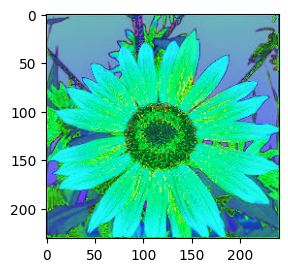

In [ ]:
plt.figure(figsize=[3, 3])
plt.imshow(img_hsv);

Однако это не совсем корректно, так как Hue - это угол, а не интенсивность. Поэтому лучше отобразить оттенок в виде цвета, а насыщенность и значение - в виде яркости:

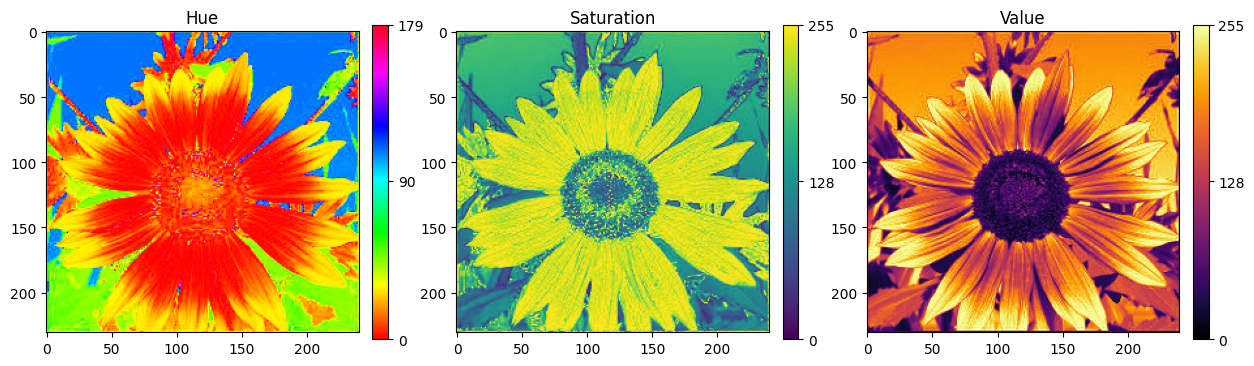

In [ ]:
h, s, v = cv2.split(img_hsv)

fig, axs = plt.subplots(1, 3, figsize=[15, 5])

im1 = axs[0].imshow(h, cmap="hsv")
axs[0].set_title('Hue')
cbar1 = plt.colorbar(im1, ax=axs[0], fraction=0.046, pad=0.04, ticks=[0, 90, 179])
cbar1.ax.set_yticklabels(['0', '90', '179'])

im2 = axs[1].imshow(s, cmap="viridis")  # Using 'viridis' for Saturation
axs[1].set_title('Saturation')
cbar2 = plt.colorbar(im2, ax=axs[1], fraction=0.046, pad=0.04, ticks=[0, 128, 255])
cbar2.ax.set_yticklabels(['0', '128', '255'])

im3 = axs[2].imshow(v, cmap="inferno")  # Using 'inferno' for Value
axs[2].set_title('Value')
cbar3 = plt.colorbar(im3, ax=axs[2], fraction=0.046, pad=0.04, ticks=[0, 128, 255])
cbar3.ax.set_yticklabels(['0', '128', '255'])

plt.show()

## Упражнение 2

Попробуйте другие цветовые пространства, конвертация в которые реализована в OpenCV.

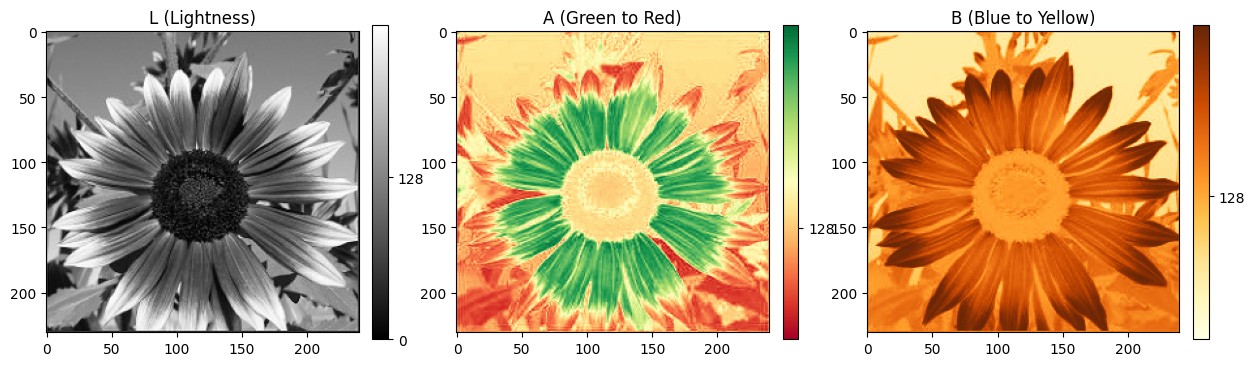

In [ ]:
img_lab = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2LAB)
l, a, b = cv2.split(img_lab)

fig, axs = plt.subplots(1, 3, figsize=[15, 5])

im1 = axs[0].imshow(l, cmap="gray")
axs[0].set_title('L (Lightness)')
cbar1 = plt.colorbar(im1, ax=axs[0], fraction=0.046, pad=0.04, ticks=[0, 128, 255])
cbar1.ax.set_yticklabels(['0', '128', '255'])

im2 = axs[1].imshow(a, cmap="RdYlGn")  # Используем красно-зеленую карту
axs[1].set_title('A (Green to Red)')
cbar2 = plt.colorbar(im2, ax=axs[1], fraction=0.046, pad=0.04, ticks=[0, 128, 255])
cbar2.ax.set_yticklabels(['0', '128', '255'])

im3 = axs[2].imshow(b, cmap="YlOrBr")  # Используем желто-синюю карту
axs[2].set_title('B (Blue to Yellow)')
cbar3 = plt.colorbar(im3, ax=axs[2], fraction=0.046, pad=0.04, ticks=[0, 128, 255])
cbar3.ax.set_yticklabels(['0', '128', '255'])

plt.show()

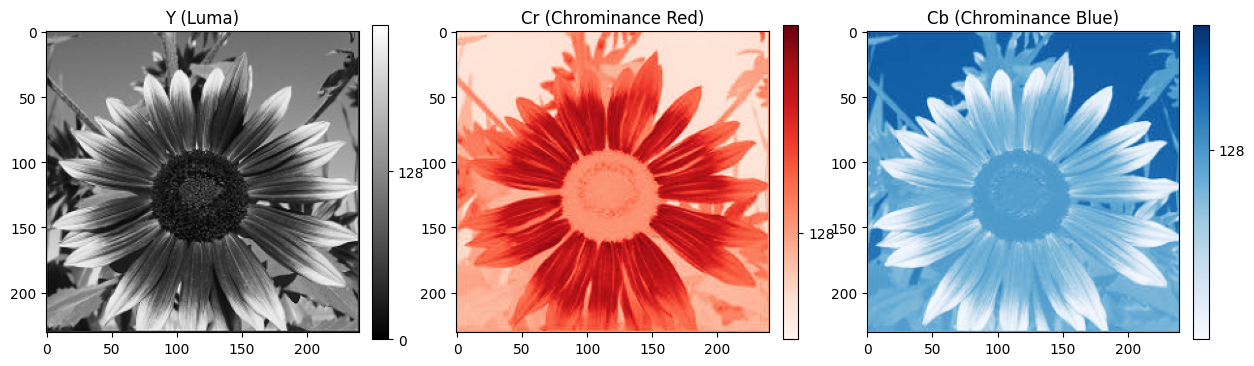

In [ ]:
img_ycrcb = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2YCrCb)
y, cr, cb = cv2.split(img_ycrcb)

fig, axs = plt.subplots(1, 3, figsize=[15, 5])

im1 = axs[0].imshow(y, cmap="gray")
axs[0].set_title('Y (Luma)')
cbar1 = plt.colorbar(im1, ax=axs[0], fraction=0.046, pad=0.04, ticks=[0, 128, 255])
cbar1.ax.set_yticklabels(['0', '128', '255'])

im2 = axs[1].imshow(cr, cmap="Reds")  # Используем красную карту
axs[1].set_title('Cr (Chrominance Red)')
cbar2 = plt.colorbar(im2, ax=axs[1], fraction=0.046, pad=0.04, ticks=[0, 128, 255])
cbar2.ax.set_yticklabels(['0', '128', '255'])

im3 = axs[2].imshow(cb, cmap="Blues")  # Используем синюю карту
axs[2].set_title('Cb (Chrominance Blue)')
cbar3 = plt.colorbar(im3, ax=axs[2], fraction=0.046, pad=0.04, ticks=[0, 128, 255])
cbar3.ax.set_yticklabels(['0', '128', '255'])

plt.show()

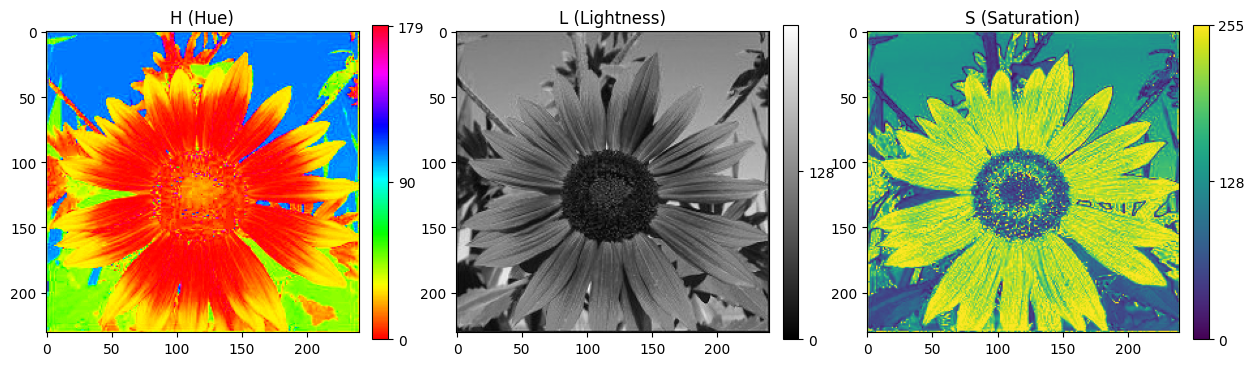

In [ ]:
img_hls = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2HLS)
h, l, s = cv2.split(img_hls)

fig, axs = plt.subplots(1, 3, figsize=[15, 5])

im1 = axs[0].imshow(h, cmap="hsv")
axs[0].set_title('H (Hue)')
cbar1 = plt.colorbar(im1, ax=axs[0], fraction=0.046, pad=0.04, ticks=[0, 90, 179])
cbar1.ax.set_yticklabels(['0', '90', '179'])

im2 = axs[1].imshow(l, cmap="gray")
axs[1].set_title('L (Lightness)')
cbar2 = plt.colorbar(im2, ax=axs[1], fraction=0.046, pad=0.04, ticks=[0, 128, 255])
cbar2.ax.set_yticklabels(['0', '128', '255'])

im3 = axs[2].imshow(s, cmap="viridis")  # Используем 'viridis' для насыщенности
axs[2].set_title('S (Saturation)')
cbar3 = plt.colorbar(im3, ax=axs[2], fraction=0.046, pad=0.04, ticks=[0, 128, 255])
cbar3.ax.set_yticklabels(['0', '128', '255'])

plt.show()

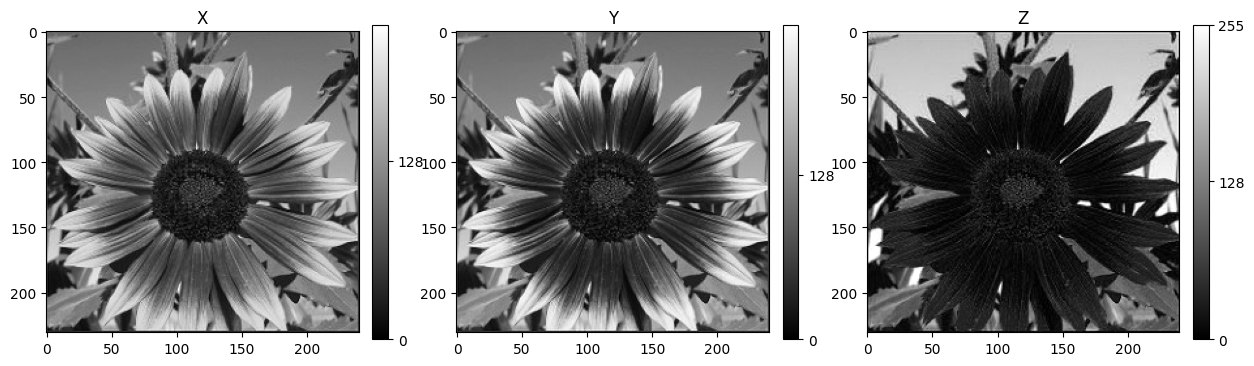

In [ ]:
img_xyz = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2XYZ)
x, y, z = cv2.split(img_xyz)

fig, axs = plt.subplots(1, 3, figsize=[15, 5])

im1 = axs[0].imshow(x, cmap="gray")
axs[0].set_title('X')
cbar1 = plt.colorbar(im1, ax=axs[0], fraction=0.046, pad=0.04, ticks=[0, 128, 255])
cbar1.ax.set_yticklabels(['0', '128', '255'])

im2 = axs[1].imshow(y, cmap="gray")
axs[1].set_title('Y')
cbar2 = plt.colorbar(im2, ax=axs[1], fraction=0.046, pad=0.04, ticks=[0, 128, 255])
cbar2.ax.set_yticklabels(['0', '128', '255'])

im3 = axs[2].imshow(z, cmap="gray")
axs[2].set_title('Z')
cbar3 = plt.colorbar(im3, ax=axs[2], fraction=0.046, pad=0.04, ticks=[0, 128, 255])
cbar3.ax.set_yticklabels(['0', '128', '255'])

plt.show()

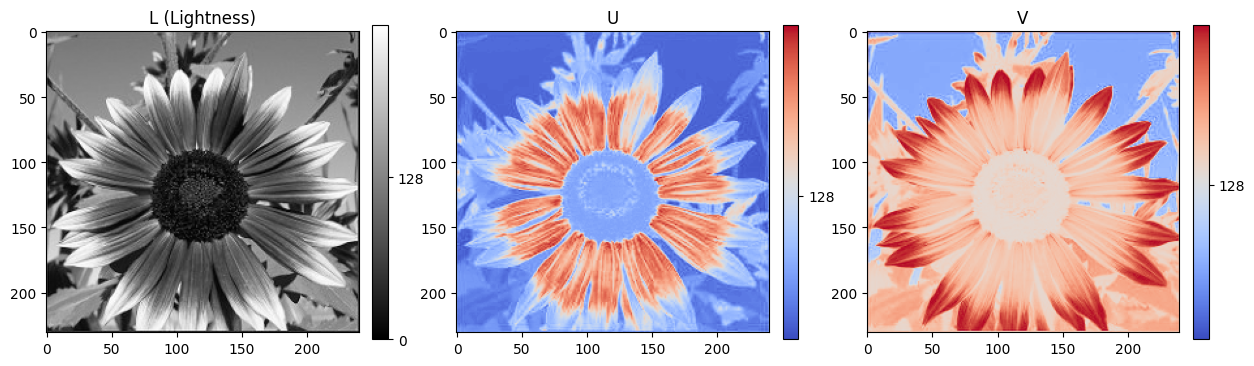

In [ ]:
img_luv = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2LUV)
l, u, v = cv2.split(img_luv)

fig, axs = plt.subplots(1, 3, figsize=[15, 5])

im1 = axs[0].imshow(l, cmap="gray")
axs[0].set_title('L (Lightness)')
cbar1 = plt.colorbar(im1, ax=axs[0], fraction=0.046, pad=0.04, ticks=[0, 128, 255])
cbar1.ax.set_yticklabels(['0', '128', '255'])

im2 = axs[1].imshow(u, cmap="coolwarm")  # Используем красно-синюю карту
axs[1].set_title('U')
cbar2 = plt.colorbar(im2, ax=axs[1], fraction=0.046, pad=0.04, ticks=[0, 128, 255])
cbar2.ax.set_yticklabels(['0', '128', '255'])

im3 = axs[2].imshow(v, cmap="coolwarm")  # Используем красно-синюю карту
axs[2].set_title('V')
cbar3 = plt.colorbar(im3, ax=axs[2], fraction=0.046, pad=0.04, ticks=[0, 128, 255])
cbar3.ax.set_yticklabels(['0', '128', '255'])

plt.show()

## Вопрос 3

В каких задачах переход из RGB в другое цветовое пространство может быть полезным?

**Ответ:** Если еобходимо упростить изображение для анализа (Grayscale): детекция улыбок(цвет не важен) или рентгеновские снимки(они и так близки к черно-белым).



# 2. Гистограмма изображения

Напомним, что гистограммой изображения называется функция, показыващая количество пикселей изображения с заданным в качестве аргумента значением интенсивности:

$$
    h(v) = \sum_{x = 0}^{W - 1} \sum_{y = 0}^{H - 1} [f(x, y) = v]
$$

Если дополнительно потребовать, чтобы $\sum_{v = 0}^{255} h(v) = 1$, то $h$ будет представлять функцию плотности распределения интенсивности на изображении.

Определим вспомогательную функцию, позволяющую визуализировать гистограмму:

In [10]:
def visualize_hist(hist):
    plt.figure(figsize=[12, 3])
    plt.bar(np.arange(len(hist)), hist / hist.sum())

Рассчитать гистограмму можно с помощью встроенной функции OpenCV:

In [11]:
hist_cv = cv2.calcHist([img_gray],      # список изображений
                       [0],             # список каналов
                       None,            # маска (без маски)
                       [256],           # размер гистограммы
                       [0, 256])[:, 0]  # диапазон значений

Результат представляет собой обычный массив длины 256:

In [12]:
print('hist_cv.shape = ', hist_cv.shape)

hist_cv.shape =  (256,)


и выглядит следующим образом:

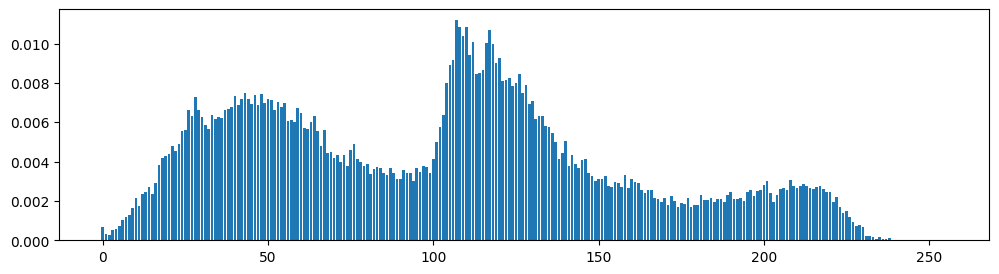

In [13]:
visualize_hist(hist_cv)

## Упражнение 3: Построение гистограммы

Реализуйте функцию для расчета гистограммы изображения. Используйте ее для визуализации трех каналов RGB изображения.

In [14]:
def compute_hist(img):
    if len(img.shape) == 2:  # если серое
        hist = np.zeros(256)
        for intensity in range(256):
            hist[intensity] = np.sum(img == intensity)
    elif len(img.shape) == 3:  # Если RGB
        hist = np.zeros((3, 256))
        for channel in range(3):
            for intensity in range(256):
                hist[channel, intensity] = np.sum(img[:, :, channel] == intensity)
    return hist

In [15]:
hist_gray = compute_hist(img_gray)

hist_r = compute_hist(img_rgb[:, :, 0])
hist_g = compute_hist(img_rgb[:, :, 1])
hist_b = compute_hist(img_rgb[:, :, 2])

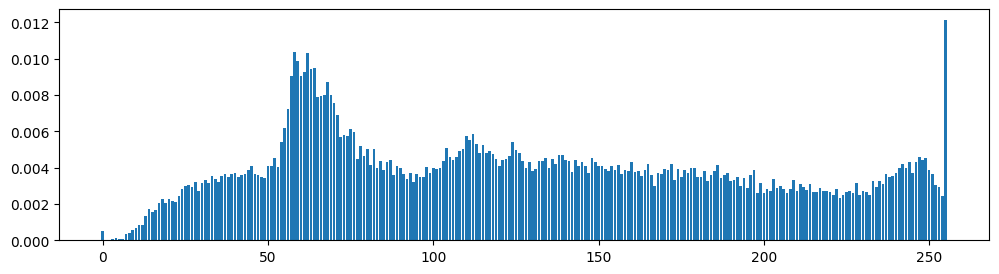

In [16]:
visualize_hist(hist_r)

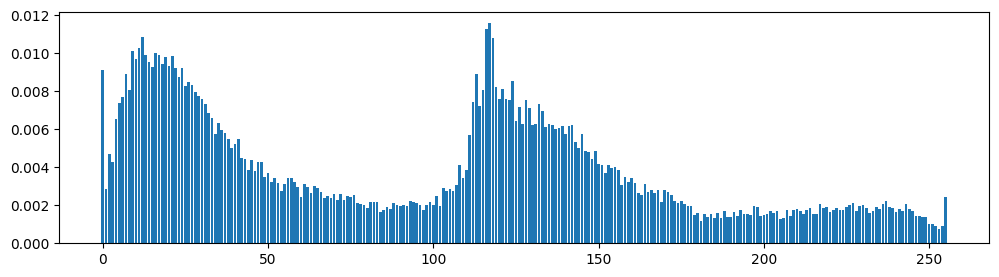

In [17]:
visualize_hist(hist_g)

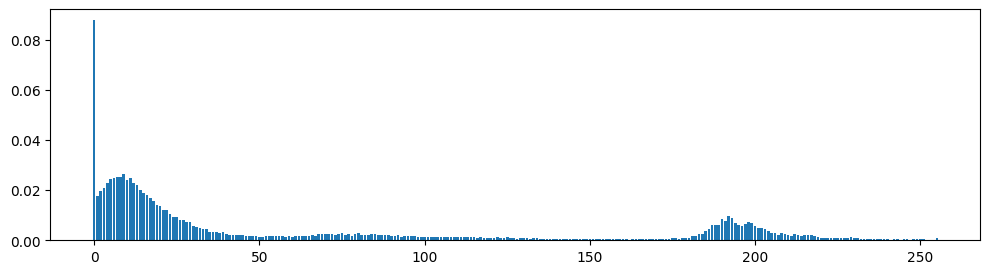

In [18]:
visualize_hist(hist_b)

In [19]:
assert((hist_gray == hist_cv).all())

array([[[144, 125,   5],
        [108, 128,  41],
        [123, 133,  21],
        ...,
        [121, 133,  21],
        [128, 139,  35],
        [ 86,  90,   3]],

       [[113, 148,   2],
        [ 37,  93, 242],
        [ 41,  90, 227],
        ...,
        [ 58, 115, 231],
        [ 68, 120, 242],
        [ 51,  62,  54]],

       [[149, 143,  21],
        [ 44,  95, 220],
        [ 55, 105, 190],
        ...,
        [ 77, 118, 197],
        [ 71, 130, 248],
        [ 55,  66,  36]],

       ...,

       [[141, 145,   6],
        [  2,  13,  15],
        [ 27,  41,  24],
        ...,
        [110, 151,  75],
        [128, 171, 100],
        [ 53,  66,  12]],

       [[149, 151,  24],
        [  0,  10,   6],
        [ 11,  24,   0],
        ...,
        [129, 172, 100],
        [138, 184, 119],
        [ 67,  85,  35]],

       [[102,  97,   3],
        [ 33,  41,  20],
        [ 53,  61,  12],
        ...,
        [ 34,  48,   0],
        [ 43,  61,  13],
        [ 35,  24,   0]]], dtype=uint8)
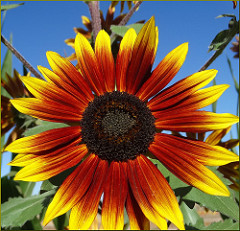

In [20]:
img_rgb

## Вопрос 4

 Что можно сказать об изображении по его гистограмме?

**Ответ:** если смещена влево - то тёмное изображение, вправо - светлое. Высокий пик - много пикселей такой яркости. Красный: все яркости есть, но преобладает немного темный оттенок - как на самом цветке. У зеленого два отчетливый оттенка - темный и посветлее. Синего есть что-то темное и что-то светлое, хотя всё небо мне видится светлым, я ожидал побольше пик в светлой области.

## Вопрос 5

Допустим, вы смотрите некоторый фильм и для текущего кадра выводите его гистограмму. Как будет меняться эта гистограмма с течением времени? Опишите несколько случаев: смена камеры, смена освещения, смена сцены.

**Ответ:** Смена сцены - резкое изменение будет, совершенно разные гистограммы. Смена камеры на одной сцене - будет изменение гистограммы, но не такое резкое. При смене освещения гистограмма будет уезжать влево или вправо, а характер сдвига будет зависеть от характера изменения освещения.

## Упражнение 4: JPEG и гистограмма

Исследуйте, как влияет степень сжатия алгоритма JPEG на вид гистограммы изображения.

Используйте черно-белое изображение `img_gray`. Визуализируйте степени сжатия 90, 60, 30, 5.

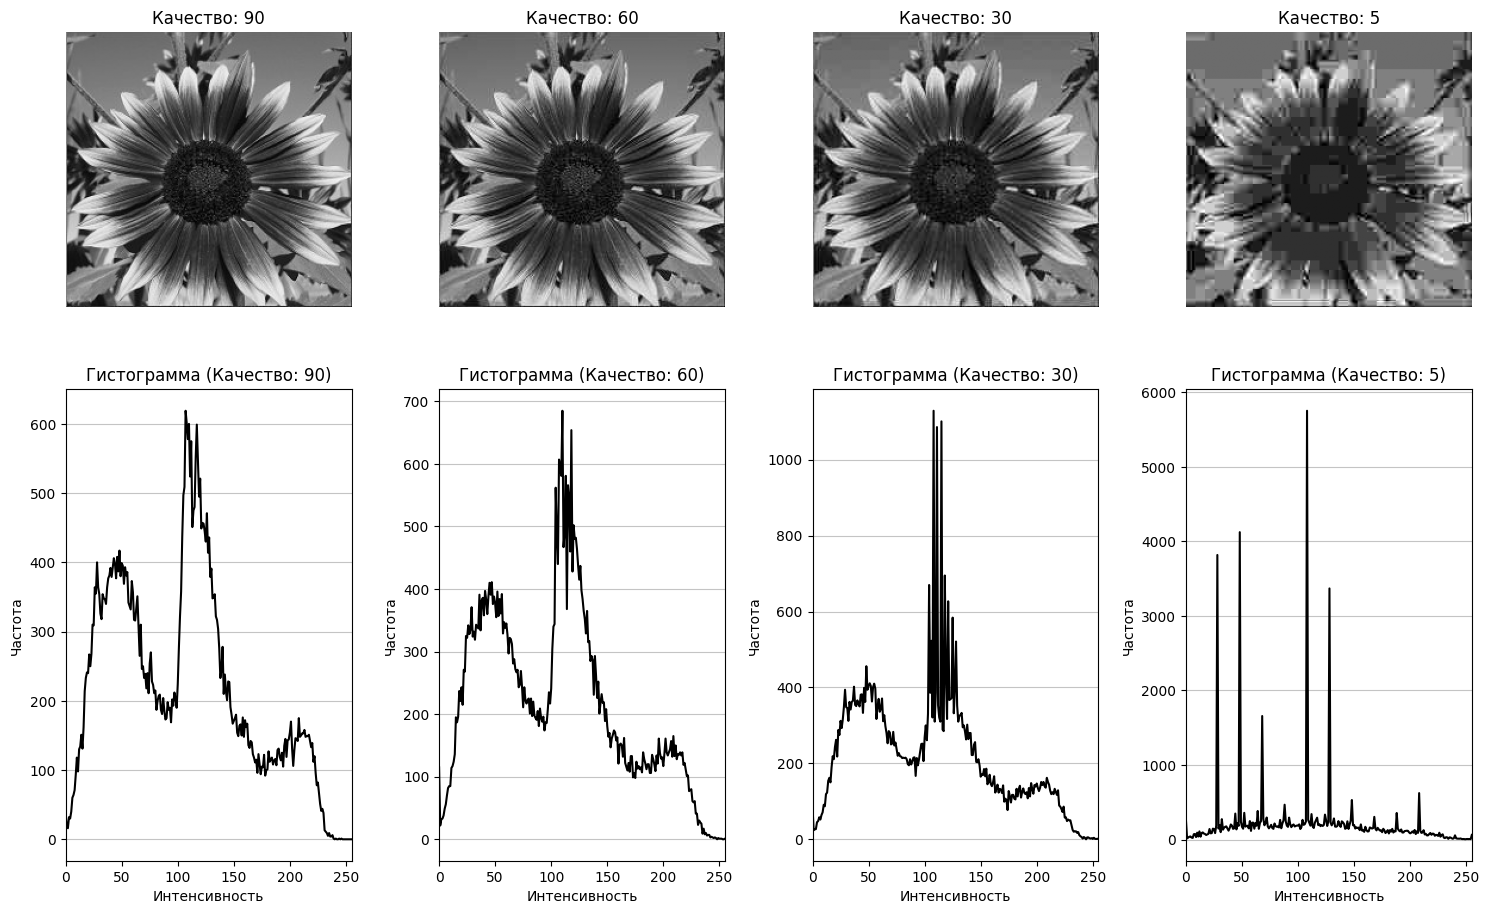

In [21]:
def compress_image(image, quality):
    encode_param = [int(cv2.IMWRITE_JPEG_QUALITY), quality]
    _, img_encoded = cv2.imencode('.jpg', image, encode_param)
    img_compressed = cv2.imdecode(img_encoded, cv2.IMREAD_GRAYSCALE)
    return img_compressed

qualities = [90, 60, 30, 5]

plt.figure(figsize=(15, 10))

for i, quality in enumerate(qualities):
    img_compressed = compress_image(img_gray, quality)

    hist = cv2.calcHist([img_compressed], [0], None, [256], [0, 256])

    plt.subplot(2, 4, i + 1)
    plt.imshow(img_compressed, cmap='gray')
    plt.title(f'Качество: {quality}')
    plt.axis('off')

    plt.subplot(2, 4, i + 5)
    plt.plot(hist, color='black')
    plt.title(f'Гистограмма (Качество: {quality})')
    plt.xlabel('Интенсивность')
    plt.ylabel('Частота')
    plt.xlim([0, 255])
    plt.grid(axis='y', alpha=0.75)

plt.tight_layout()
plt.show()

## Упражнение 5: Сегментация

На загруженном аэроортофотоплане выделите зеленые насаждения. Для этого постройте бинарную маску, где 1 будет отвечать наличию насаждений в данном пикселе, 0 - их отсутствию, и визуализируйте её. А также рассчитайте, какую долю изображения занимают зеленые насаждения. С какой ошибкой (погрешностью) получена эта величина?

**Подсказка:** вам должно помочь HSV пространство и гистограмма. Погрешность может быть оценена на глаз, по вашей неуверенности в определении порога отделения классов 'зеленые насаждения'/'прочее'.

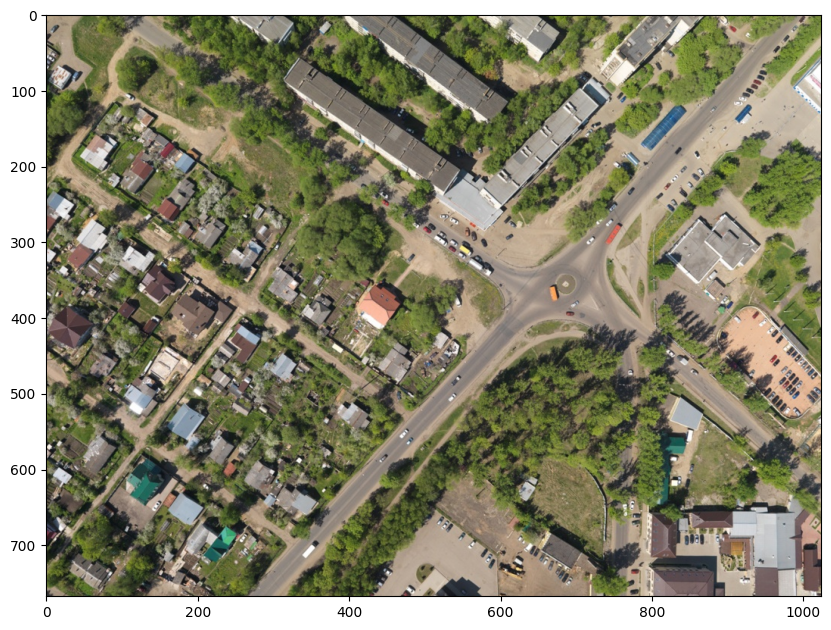

In [22]:
aerial_image = cv2.cvtColor(cv2.imread(AERIAL_IMG_PATH), cv2.COLOR_BGR2RGB)

plt.figure(figsize=[10, 10])
plt.imshow(aerial_image);

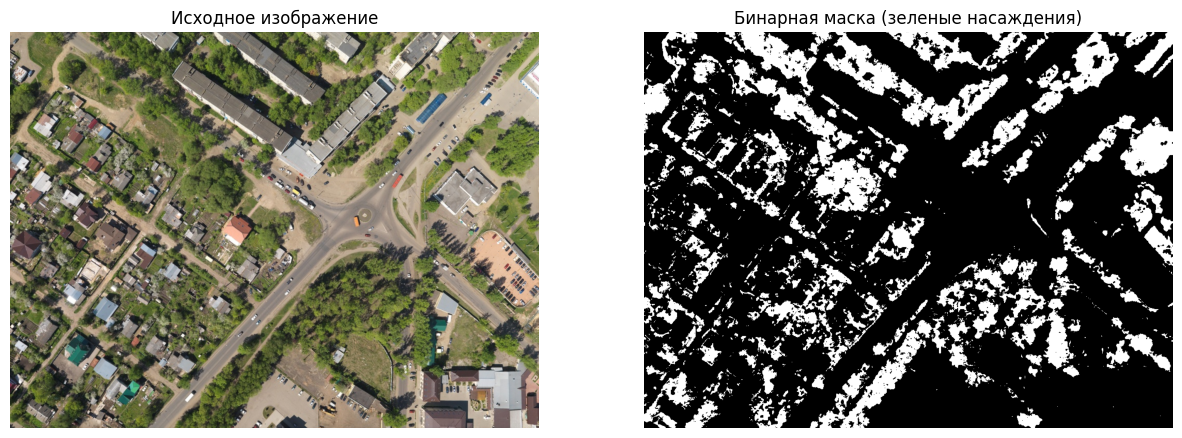

Доля зеленых насаждений: 0.2371 (23.71%)
Доля зеленых насаждений (с учетом погрешности):
Нижняя граница: 0.3202 (32.02%)
Верхняя граница: 0.2384 (23.84%)


In [24]:
hsv_image = cv2.cvtColor(aerial_image, cv2.COLOR_RGB2HSV)

lower_green = np.array([35, 50, 50])
upper_green = np.array([85, 255, 255])

green_mask = cv2.inRange(hsv_image,
                         lower_green,
                         upper_green)

plt.figure(figsize=[15, 7])

plt.subplot(121)
plt.imshow(aerial_image)
plt.title('Исходное изображение')
plt.axis('off')

plt.subplot(122)
plt.imshow(green_mask, cmap='gray')
plt.title('Бинарная маска (зеленые насаждения)')
plt.axis('off')

plt.show()

total_pixels = green_mask.size
green_pixels = np.sum(green_mask == 255)
green_fraction = green_pixels / total_pixels

print(f"Доля зеленых насаждений: {green_fraction:.4f} ({green_fraction * 100:.2f}%)")


# Погрешность считаем на основе выбора порогов
hue_error = 5
lower_green_error = np.array([35 - hue_error, 50, 50])
upper_green_error = np.array([85 + hue_error, 255, 255])

green_mask_lower = cv2.inRange(hsv_image, lower_green_error, upper_green)
green_mask_upper = cv2.inRange(hsv_image, lower_green, upper_green_error)

green_pixels_lower = np.sum(green_mask_lower == 255)
green_pixels_upper = np.sum(green_mask_upper == 255)

green_fraction_lower = green_pixels_lower / total_pixels
green_fraction_upper = green_pixels_upper / total_pixels

print(f"Доля зеленых насаждений (с учетом погрешности):")
print(f"Нижняя граница: {green_fraction_lower:.4f} ({green_fraction_lower * 100:.2f}%)")
print(f"Верхняя граница: {green_fraction_upper:.4f} ({green_fraction_upper * 100:.2f}%)")

# 3. Интегральные изображения

## Упражнение 6

Напомним, что интегральным изображением называется следующая функция:

$$
    I(x, y) = \sum_{i = 0}^{x} \sum_{j = 0}^{y} f(i, j)
$$

С помощью интегрального изображения можно за $O(1)$ вычислять сумму интенсивностей в произвольной прямоугольной области. Требуется реализовать расчет интегрального изображения, а также быстрый расчет сумм интенсивностей в прямоугольнике заданном верхним левым углом, шириной и высотой $x, y, w, h$.

In [25]:
class IntegralImage:
    def __init__(self, img):
        assert len(img.shape) == 2
        self.img = img
        self.integral = self._compute_integral_image()

    def _compute_integral_image(self):
        rows, cols = self.img.shape
        integral = np.zeros((rows, cols), dtype=np.int32)

        integral[0, 0] = self.img[0, 0]
        for i in range(1, rows):
            integral[i, 0] = integral[i-1, 0] + self.img[i, 0]
        for j in range(1, cols):
            integral[0, j] = integral[0, j-1] + self.img[0, j]

        for i in range(1, rows):
            for j in range(1, cols):
                integral[i, j] = (
                    self.img[i, j] +
                    integral[i-1, j] +
                    integral[i, j-1] -
                    integral[i-1, j-1]
                )
        return integral

    def sum(self, x, y, w, h):

        x2 = x + w - 1
        y2 = y + h - 1

        A = self.integral[x2, y2]
        B = self.integral[x-1, y2] if x > 0 else 0
        C = self.integral[x2, y-1] if y > 0 else 0
        D = self.integral[x-1, y-1] if x > 0 and y > 0 else 0

        return A - B - C + D

In [26]:
I = IntegralImage(img_gray)

In [27]:
x, y, w, h = 0, 0, 100, 100
assert(img_gray[y:y + h, x:x + w].sum() == I.sum(x, y, w, h))

x, y, w, h = 100, 100, 100, 100
assert(img_gray[y:y + h, x:x + w].sum() == I.sum(x, y, w, h))

## Вопрос 6

В каких задачах может потребоваться использовать интегральное изображение?

**Ответ:** там, где часто надо вычислять суммы в различных областях (фильтры, свертки)

## Вопрос 7

Какому методу решения задачи в программировании следует метод расчета интегрального изображения?

**Ответ:** динамическому программированию